In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
dataname = 'pew'

In [20]:
mcm = pd.read_csv(f'../data/{dataname}_mcm.csv')
gpt = pd.read_csv(f'../data/{dataname}_gpt3.csv')
gpt2 = pd.read_csv(f'../data/{dataname}_gpt2_token_pairs.csv')

In [21]:
countries = list(mcm.country.unique())
n = len(countries)
dataname = dataname.replace('_w7', '')
n

39

In [22]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

In [23]:
mcm.head()

,country,question,mcm_score,universal_mcm_score,pew_rating,pew_score
0,United States,using contraceptives,-0.286868,-0.103034,"{'Morally acceptable': 0.5199600798403193, 'No...",0.459082
1,United States,getting a divorce,-0.600113,-0.684895,"{'Morally acceptable': 0.3403193612774451, 'No...",0.132735
2,United States,having an abortion,-0.611570,-0.729079,"{'Morally acceptable': 0.17465069860279442, 'N...",-0.296407
3,United States,homosexuality,0.218746,0.446673,"{'Morally acceptable': 0.2125748502994012, 'No...",-0.158683
4,United States,drinking alcohol,-0.239003,0.013909,"{'Morally acceptable': 0.33033932135728544, 'N...",0.177645


In [24]:
mcm['Sentence-BERT'] = mcm['mcm_score']
mcm['Human ratings'] = mcm[f'{dataname}_score']

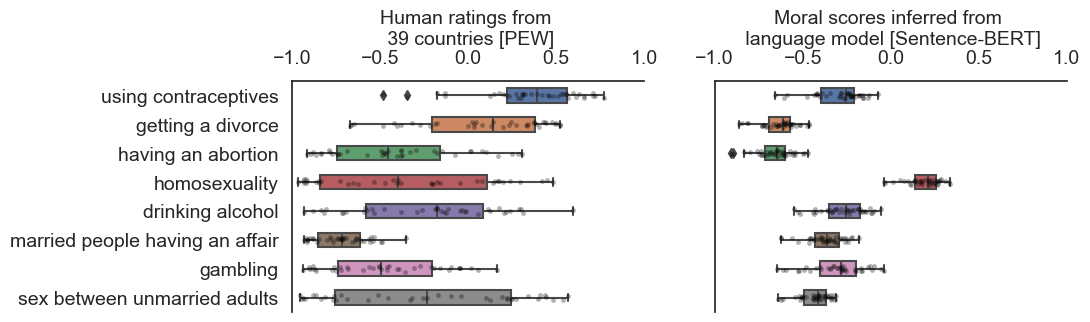

In [25]:
fig, axes = plt.subplots(1, 2, figsize = (10, 3), sharey = True)
g = sns.stripplot(x="Sentence-BERT", y="question", data=mcm, color = "black", ax = axes[1], 
                  alpha = 0.3,size = 3.5 )
g = sns.boxplot(data = mcm, x = 'Sentence-BERT', y = 'question', 
                hue = 'question', ax= axes[1],dodge =False,width=.5)


g = sns.stripplot(x="Human ratings", y="question", data=mcm, color = "black", ax = axes[0],
                  alpha = 0.3,size = 3.5)
g = sns.boxplot(data = mcm, x = 'Human ratings', y = 'question', 
                hue = 'question', ax= axes[0],dodge =False,width=.5)


axes[0].legend().remove()
axes[1].legend().remove()
axes[0].set(xlim=(-1, 1))
axes[1].set(xlim=(-1, 1))
axes[1].set_ylabel("")
axes[0].set_ylabel("")
axes[0].xaxis.tick_top()
axes[0].xaxis.set_label_position('top')

axes[1].xaxis.tick_top()
axes[1].xaxis.set_label_position('top')


axes[0].set_xlabel(f'Human ratings from \n {n} countries [{dataname.upper()}]', fontsize=14)
axes[1].set_xlabel('Moral scores inferred from \n language model [Sentence-BERT]', fontsize=14);
axes[0].tick_params(axis='both', which='major', labelsize=14)
axes[1].tick_params(axis='both', which='major', labelsize=14)



sns.despine(bottom = True, top = False, left = False)
plt.savefig(f'figs/{dataname}_fig1.png', bbox_inches = 'tight', dpi = 250)